In [50]:
!pip install matplotlib --upgrade 

    100% |████████████████████████████████| 12.5MB 1.1MB/s eta 0:00:01   45% |██████████████▊                 | 5.7MB 14.0MB/s eta 0:00:01
  Found existing installation: matplotlib 3.0.3
    Uninstalling matplotlib-3.0.3:
      Successfully uninstalled matplotlib-3.0.3


In [277]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime

In [2]:
import matplotlib
matplotlib.__version__

'3.2.1'

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
btc = pd.read_csv('btc_april.csv')

In [5]:
btc.head()

date  AdrActCnt  BlkCnt  BlkSizeByte  BlkSizeMeanByte  CapMVRVCur  \
0  2009-01-03          0       0            0              NaN         NaN   
1  2009-01-04          0       0            0              NaN         NaN   
2  2009-01-05          0       0            0              NaN         NaN   
3  2009-01-06          0       0            0              NaN         NaN   
4  2009-01-07          0       0            0              NaN         NaN   

   CapMrktCurUSD  CapRealUSD  DiffMean  FeeMeanNtv  FeeMeanUSD  FeeMedNtv  \
0            NaN         0.0       NaN         NaN         NaN        NaN   
1            NaN         0.0       NaN         NaN         NaN        NaN   
2            NaN         0.0       NaN         NaN         NaN        NaN   
3            NaN         0.0       NaN         NaN         NaN        NaN   
4            NaN         0.0       NaN         NaN         NaN        NaN   

   FeeMedUSD  FeeTotNtv  FeeTotUSD  HashRate  IssContNtv  IssContPctAnn  \
0        NaN        0.0        NaN       NaN         NaN            NaN   
1        NaN        0.0        NaN       NaN         NaN            NaN   
2        NaN        0.0        NaN       NaN         NaN            NaN   
3        NaN        0.0        NaN       NaN         NaN            NaN   
4        NaN        0.0        NaN       NaN         NaN            NaN   

   IssContUSD  IssTotNtv  IssTotUSD  NVTAdj  NVTAdj90  PriceBTC  PriceUSD  \
0         NaN        NaN        NaN     NaN       NaN         1       NaN   
1         NaN        NaN        NaN     NaN       NaN         1       NaN   
2         NaN        NaN        NaN     NaN       NaN         1       NaN   
3         NaN        NaN        NaN     NaN       NaN         1       NaN   
4         NaN        NaN        NaN     NaN       NaN         1       NaN   

   ROI1yr  ROI30d  SplyCur  TxCnt  TxTfrCnt  TxTfrValAdjNtv  TxTfrValAdjUSD  \
0     NaN     NaN      0.0      0         0             0.0             NaN   
1     NaN     NaN      0.0      0         0             0.0             NaN   
2     NaN     NaN      0.0      0         0             0.0             NaN   
3     NaN     NaN      0.0      0         0             0.0             NaN   
4     NaN     NaN      0.0      0         0             0.0             NaN   

   TxTfrValMeanNtv  TxTfrValMeanUSD  TxTfrValMedNtv  TxTfrValMedUSD  \
0              NaN              NaN             NaN             NaN   
1              NaN              NaN             NaN             NaN   
2              NaN              NaN             NaN             NaN   
3              NaN              NaN             NaN             NaN   
4              NaN              NaN             NaN             NaN   

   TxTfrValNtv  TxTfrValUSD  VtyDayRet180d  VtyDayRet30d  VtyDayRet60d  
0          0.0          NaN            NaN           NaN           NaN  
1          0.0          NaN            NaN           NaN           NaN  
2          0.0          NaN            NaN           NaN           NaN  
3          0.0          NaN            NaN           NaN           NaN  
4          0.0          NaN            NaN           NaN           NaN

In [6]:
#look at Issuance Count to determine exact dates where block reward halvings occured 
#1st halving: 2012-11-29
#2nd halving: 2016-07-10
# ~3rd halving: 2020-05-12 

btc[['date', 'IssContNtv']].head()

date  IssContNtv
0  2009-01-03         NaN
1  2009-01-04         NaN
2  2009-01-05         NaN
3  2009-01-06         NaN
4  2009-01-07         NaN

In [7]:
#we are only interested in btc volatility 

btc_vol = btc[['date', 'VtyDayRet180d', 'VtyDayRet60d', 'VtyDayRet30d']]

In [8]:
btc_vol.head() 

date  VtyDayRet180d  VtyDayRet60d  VtyDayRet30d
0  2009-01-03            NaN           NaN           NaN
1  2009-01-04            NaN           NaN           NaN
2  2009-01-05            NaN           NaN           NaN
3  2009-01-06            NaN           NaN           NaN
4  2009-01-07            NaN           NaN           NaN

In [9]:
#checking for NaNs 
btc_vol = btc_vol.fillna(0)
btc_vol.isna().sum()

date             0
VtyDayRet180d    0
VtyDayRet60d     0
VtyDayRet30d     0
dtype: int64

In [10]:
btc_vol.head()

date  VtyDayRet180d  VtyDayRet60d  VtyDayRet30d
0  2009-01-03            0.0           0.0           0.0
1  2009-01-04            0.0           0.0           0.0
2  2009-01-05            0.0           0.0           0.0
3  2009-01-06            0.0           0.0           0.0
4  2009-01-07            0.0           0.0           0.0

In [11]:
#had to convert 'date' column to datetime since the 'str' format wasn't beind handled well by 'plt' or 'sns' 

btc_vol['date'] = pd.to_datetime(btc_vol['date'])

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


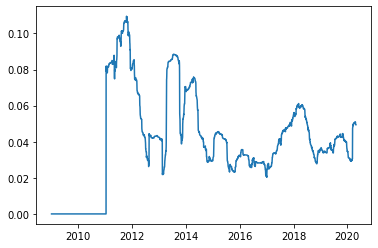

In [12]:
ax = plt.plot(btc_vol['date'], btc_vol['VtyDayRet180d'])

In [13]:
#using seaborn now 
vol_plot_fast = sns.lineplot(x='date', y='VtyDayRet30d', data=btc_vol)

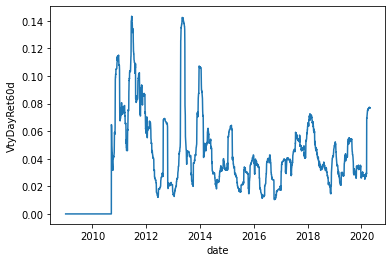

In [14]:
vol_plot_med = sns.lineplot(x='date', y='VtyDayRet60d', data=btc_vol)

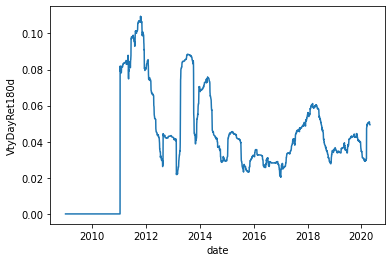

In [15]:
vol_plot_slow = sns.lineplot(x='date', y='VtyDayRet180d', data=btc_vol)

In [414]:
#might be more useful to zoom in 

#divide df for period between inception and 1st halving 
#and from 1st halving to 2nd halving 
#and finally from 2nd halving to preent 

#creating masks 
halv_1 = btc_vol[btc_vol['date'] == '2012-11-28']
halv_2 = btc_vol[btc_vol['date'] == '2016-07-09']

In [105]:
vol_1st_halv = btc_vol[0:halv_1.index[0]+1]
vol_2nd_halv = btc_vol[halv_1.index[0]:halv_2.index[0]+1]
vol_pre = btc_vol[halv_2.index[0]:-1]

In [106]:
vol_1st_halv.head()

date  VtyDayRet180d  VtyDayRet60d  VtyDayRet30d
0 2009-01-03            0.0           0.0           0.0
1 2009-01-04            0.0           0.0           0.0
2 2009-01-05            0.0           0.0           0.0
3 2009-01-06            0.0           0.0           0.0
4 2009-01-07            0.0           0.0           0.0

In [107]:
vol_2nd_halv.head()

date  VtyDayRet180d  VtyDayRet60d  VtyDayRet30d
1425 2012-11-28       0.043315      0.022061      0.018460
1426 2012-11-29       0.043314      0.022129      0.018274
1427 2012-11-30       0.043307      0.022146      0.017831
1428 2012-12-01       0.043308      0.021721      0.014788
1429 2012-12-02       0.043272      0.021685      0.014778

In [108]:
vol_pre.head()

date  VtyDayRet180d  VtyDayRet60d  VtyDayRet30d
2744 2016-07-09       0.031107      0.039965      0.050595
2745 2016-07-10       0.031079      0.039983      0.050612
2746 2016-07-11       0.031028      0.039988      0.050061
2747 2016-07-12       0.031090      0.040106      0.046743
2748 2016-07-13       0.028782      0.040222      0.045894

In [109]:
plt.figure(figsize=(20, 8))
vol_halv1_plot = sns.lineplot(x='date', y='VtyDayRet180d', data=vol_1st_halv)

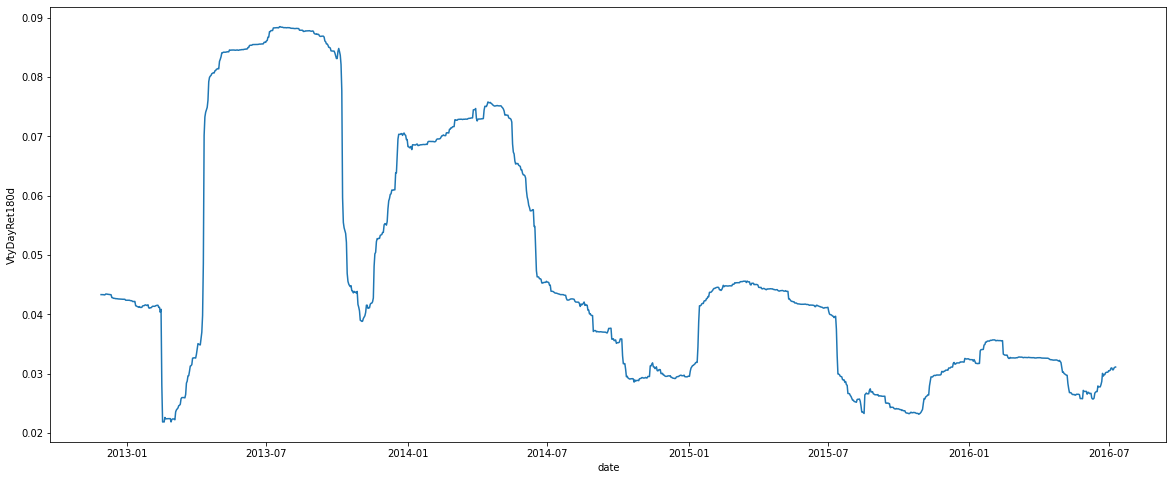

In [110]:
plt.figure(figsize=(20, 8))
vol_halv2_plot = sns.lineplot(x='date', y='VtyDayRet180d', data=vol_2nd_halv)

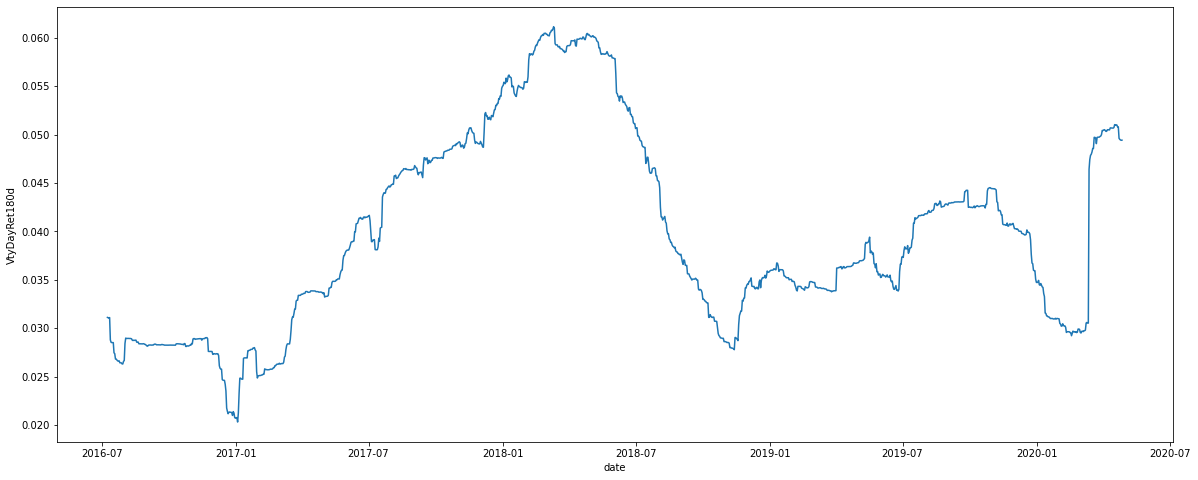

In [111]:
plt.figure(figsize=(20, 8))
vol_pre_plot = sns.lineplot(x='date', y='VtyDayRet180d', data=vol_pre)

In [112]:
#let's further zoom in and analyze volatility 1 month prior and 1 month post 1st halving 

first_halv_prior_post =  btc_vol[halv_1.index[0]-30:halv_1.index[0]+31]

In [113]:
#30 days prior and 30 days post 1st halving 

first_halv_prior_post.head()

date  VtyDayRet180d  VtyDayRet60d  VtyDayRet30d
1395 2012-10-29       0.042805      0.022630      0.024427
1396 2012-10-30       0.042819      0.021382      0.024892
1397 2012-10-31       0.042842      0.021572      0.025499
1398 2012-11-01       0.043020      0.022380      0.025830
1399 2012-11-02       0.043027      0.022152      0.025612

In [114]:
max_vol = max(first_halv_prior_post['VtyDayRet30d'])
max_vol

0.02677020575468653

In [115]:
#creating mask in order to map index to date of max volatility 

max_v = first_halv_prior_post[['VtyDayRet30d']][first_halv_prior_post[['VtyDayRet30d']] == max_vol]
max_v = max_v.dropna()
max_v

VtyDayRet30d
1419       0.02677

In [116]:
max_val_index = max_v.index[0]
max_val_index

1419

In [117]:
halv1 = first_halv_prior_post[['date', 'VtyDayRet30d']].loc[max_val_index][0]
halv1

Timestamp('2012-11-22 00:00:00')

In [118]:
#red line shows us max volatility for the current period 
#blue line shows exact date of halving 

fig, ax = plt.subplots(figsize = (15,6))    
fig.autofmt_xdate() 
plt.axvline(halv1, color='r', linestyle='--', lw=2)
plt.axvline('2012-11-29', color='b', linestyle='--', lw=2)
fig = sns.lineplot(x='date', y='VtyDayRet30d', data=first_halv_prior_post)

In [119]:
#repeating the process from above to the data from the 2nd halving 

first_halv2_prior_post = btc_vol[halv_2.index[0]-30:halv_2.index[0]+31]

In [120]:
first_halv2_prior_post.head()

date  VtyDayRet180d  VtyDayRet60d  VtyDayRet30d
2714 2016-06-09       0.025711      0.021720      0.026091
2715 2016-06-10       0.025709      0.021718      0.026097
2716 2016-06-11       0.025862      0.022260      0.026853
2717 2016-06-12       0.026702      0.025423      0.031674
2718 2016-06-13       0.026868      0.025977      0.032293

In [121]:
max_vol2 = max(first_halv2_prior_post['VtyDayRet30d'])
max_vol2

0.050743380855554084

In [122]:
max_v2 = first_halv2_prior_post[['VtyDayRet30d']][first_halv2_prior_post[['VtyDayRet30d']] == max_vol2]
max_v2 = max_v2.dropna()
max_v2

VtyDayRet30d
2731      0.050743

In [123]:
max_val2_index = max_v2.index[0]
max_val2_index

2731

In [124]:
halv2 = first_halv2_prior_post[['date', 'VtyDayRet30d']].loc[max_val2_index][0]
halv2

Timestamp('2016-06-26 00:00:00')

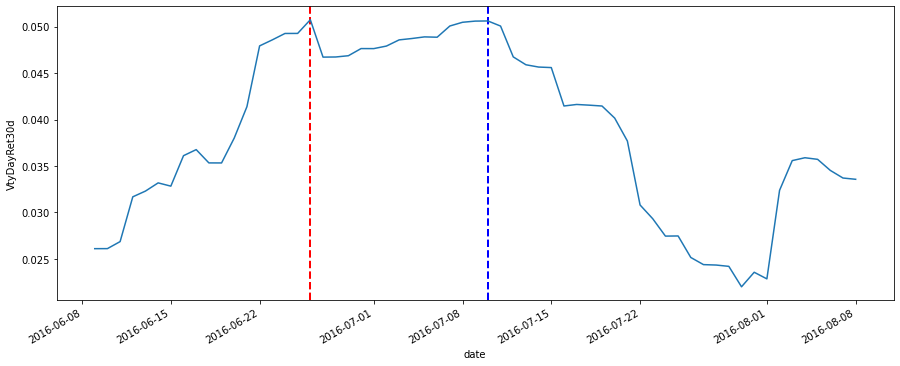

In [125]:
#red line shows us max volatility for the current period 
#blue line shows exact date of halving 

fig, ax = plt.subplots(figsize = (15,6))    
fig.autofmt_xdate() 
plt.axvline(halv2, color='r', linestyle='--', lw=2)
plt.axvline('2016-07-10', color='b', linestyle='--', lw=2)
fig = sns.lineplot(x='date', y='VtyDayRet30d', data=first_halv2_prior_post)

In [126]:
#since we don't have the data yet for the 3rd halving we compute the last 30 days of btc volatility 

first_pre_prior_post =  btc_vol[-31:-1]

In [127]:
first_pre_prior_post.head()

date  VtyDayRet180d  VtyDayRet60d  VtyDayRet30d
4102 2020-03-28       0.049850      0.074868      0.102913
4103 2020-03-29       0.050000      0.075107      0.103190
4104 2020-03-30       0.050428      0.075996      0.104759
4105 2020-03-31       0.050420      0.075989      0.104768
4106 2020-04-01       0.050477      0.076144      0.104622

In [128]:
max_vol3 = max(first_pre_prior_post['VtyDayRet30d'])
max_vol3

0.10550153113606088

In [129]:
max_v3 = first_pre_prior_post[['VtyDayRet30d']][first_pre_prior_post[['VtyDayRet30d']] == max_vol3]
max_v3 = max_v3.dropna()
max_v3

VtyDayRet30d
4111      0.105502

In [130]:
max_val3_index = max_v3.index[0]
max_val3_index

4111

In [131]:
halv3 = first_pre_prior_post[['date', 'VtyDayRet30d']].loc[max_val3_index][0]
halv3

Timestamp('2020-04-06 00:00:00')

In [132]:
fig, ax = plt.subplots(figsize = (15,6))    
fig.autofmt_xdate() 
plt.axvline(halv3, color='r', linestyle='--', lw=2)
fig = sns.lineplot(x='date', y='VtyDayRet30d', data=first_pre_prior_post)

In [ ]:
############################################################################################################
############################################################################################################

In [133]:
#let's further zoom out and analyze volatility 3 month prior and 3 month post 1st halving 

first_halv_prior_post =  btc_vol[halv_1.index[0]-90:halv_1.index[0]+91]

In [134]:
#90 days prior and 90 days post 1st halving 

first_halv_prior_post.head()

date  VtyDayRet180d  VtyDayRet60d  VtyDayRet30d
1335 2012-08-30       0.043265      0.068484      0.092851
1336 2012-08-31       0.043434      0.069032      0.093496
1337 2012-09-01       0.043402      0.068739      0.091733
1338 2012-09-02       0.043421      0.068763      0.091595
1339 2012-09-03       0.043444      0.068789      0.091741

In [135]:
max_vol = max(first_halv_prior_post['VtyDayRet30d'])
max_vol

0.09349573613845767

In [136]:
#creating mask in order to map index to date of max volatility 

max_v = first_halv_prior_post[['VtyDayRet30d']][first_halv_prior_post[['VtyDayRet30d']] == max_vol]
max_v = max_v.dropna()
max_v

VtyDayRet30d
1336      0.093496

In [137]:
max_val_index = max_v.index[0]
max_val_index

1336

In [138]:
halv1 = first_halv_prior_post[['date', 'VtyDayRet30d']].loc[max_val_index][0]
halv1

Timestamp('2012-08-31 00:00:00')

In [139]:
#red line shows us max volatility for the current period 
#blue line shows exact date of halving 

fig, ax = plt.subplots(figsize = (15,6))
fig.autofmt_xdate()
plt.axvline(halv1, color='r', linestyle='--', lw=2)
plt.axvline('2012-11-29', color='b', linestyle='--', lw=2)
fig = sns.lineplot(x='date', y='VtyDayRet30d', data=first_halv_prior_post)

In [140]:
#repeating the process from above to the data from the 2nd halving 

first_halv2_prior_post = btc_vol[halv_2.index[0]-90:halv_2.index[0]+91]

In [141]:
first_halv2_prior_post.head()

date  VtyDayRet180d  VtyDayRet60d  VtyDayRet30d
2654 2016-04-10       0.032590      0.015152      0.009364
2655 2016-04-11       0.032585      0.015135      0.008355
2656 2016-04-12       0.032588      0.015110      0.008493
2657 2016-04-13       0.032526      0.014974      0.008500
2658 2016-04-14       0.032439      0.014017      0.008504

In [142]:
max_vol2 = max(first_halv2_prior_post['VtyDayRet30d'])
max_vol2

0.050743380855554084

In [143]:
max_v2 = first_halv2_prior_post[['VtyDayRet30d']][first_halv2_prior_post[['VtyDayRet30d']] == max_vol2]
max_v2 = max_v2.dropna()
max_v2

VtyDayRet30d
2731      0.050743

In [144]:
max_val2_index = max_v2.index[0]
max_val2_index

2731

In [145]:
halv2 = first_halv2_prior_post[['date', 'VtyDayRet30d']].loc[max_val2_index][0]
halv2

Timestamp('2016-06-26 00:00:00')

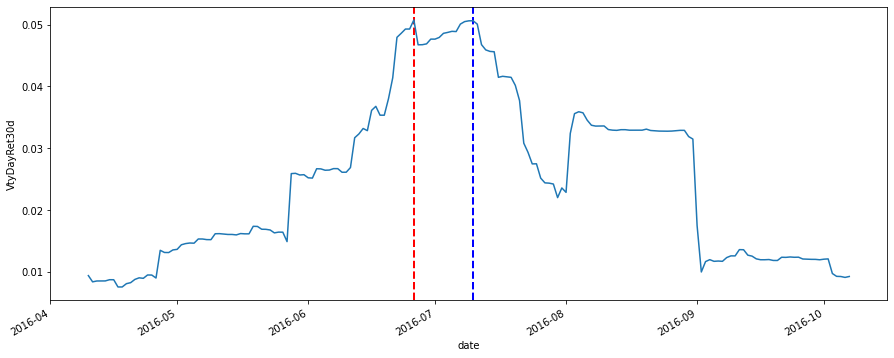

In [146]:
#red line shows us max volatility for the current period 
#blue line shows exact date of halving 

fig, ax = plt.subplots(figsize = (15,6))    
fig.autofmt_xdate() 
plt.axvline(halv2, color='r', linestyle='--', lw=2)
plt.axvline('2016-07-10', color='b', linestyle='--', lw=2)
fig = sns.lineplot(x='date', y='VtyDayRet30d', data=first_halv2_prior_post)

In [147]:
#since we don't have the data yet for the 3rd halving we compute the last 90 days of btc volatility 

first_pre_prior_post =  btc_vol[-91:-1]

In [148]:
first_pre_prior_post.head()

date  VtyDayRet180d  VtyDayRet60d  VtyDayRet30d
4042 2020-01-28       0.031006      0.027723      0.029137
4043 2020-01-29       0.030991      0.027478      0.028616
4044 2020-01-30       0.030967      0.027414      0.028517
4045 2020-01-31       0.030962      0.027445      0.028854
4046 2020-02-01       0.030497      0.027435      0.027853

In [149]:
max_vol3 = max(first_pre_prior_post['VtyDayRet30d'])
max_vol3

0.10550153113606088

In [150]:
max_v3 = first_pre_prior_post[['VtyDayRet30d']][first_pre_prior_post[['VtyDayRet30d']] == max_vol3]
max_v3 = max_v3.dropna()
max_v3

VtyDayRet30d
4111      0.105502

In [151]:
max_val3_index = max_v3.index[0]
max_val3_index

4111

In [152]:
halv3 = first_pre_prior_post[['date', 'VtyDayRet30d']].loc[max_val3_index][0]
halv3

Timestamp('2020-04-06 00:00:00')

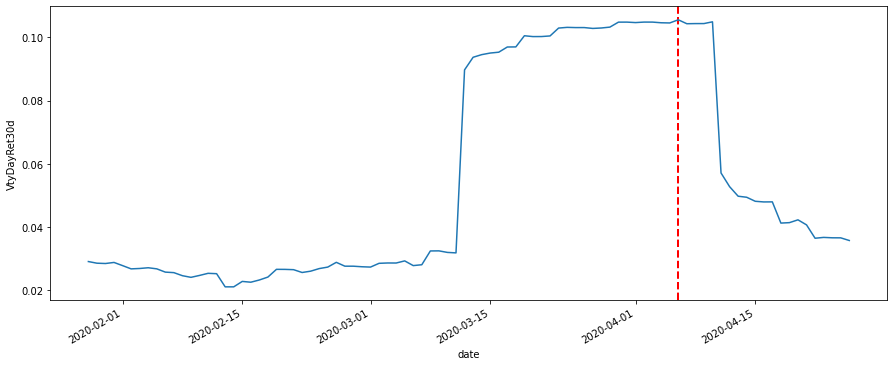

In [153]:
fig, ax = plt.subplots(figsize = (15,6))    
fig.autofmt_xdate() 
plt.axvline(halv3, color='r', linestyle='--', lw=2)
fig = sns.lineplot(x='date', y='VtyDayRet30d', data=first_pre_prior_post)

In [ ]:
############################################################################################################
############################################################################################################

In [227]:
#now let's analyze other hardforked coins: LTC, BCH, BSV, 

In [382]:
ltc = pd.read_csv('ltc_april.csv')

In [383]:
ltc.head(1)

time  AdrActCnt  BlkCnt  BlkSizeByte  BlkSizeMeanByte  \
0  2011-10-07T00:00:00.000Z        0.0     0.0          0.0              NaN   

   CapMVRVCur  CapMrktCurUSD  CapRealUSD  DiffMean  FeeMeanNtv  FeeMeanUSD  \
0         NaN            NaN         0.0       NaN         NaN         NaN   

   FeeMedNtv  FeeMedUSD  FeeTotNtv  FeeTotUSD  HashRate  IssContNtv  \
0        NaN        NaN        0.0        NaN       NaN         NaN   

   IssContPctAnn  IssContUSD  IssTotNtv  IssTotUSD  NVTAdj  NVTAdj90  \
0            NaN         NaN        NaN        NaN     NaN       NaN   

   PriceBTC  PriceUSD  ROI1yr  ROI30d  SplyCur  TxCnt  TxTfrCnt  \
0       NaN       NaN     NaN     NaN      0.0    0.0       0.0   

   TxTfrValAdjNtv  TxTfrValAdjUSD  TxTfrValMeanNtv  TxTfrValMeanUSD  \
0             0.0             NaN              NaN              NaN   

   TxTfrValMedNtv  TxTfrValMedUSD  TxTfrValNtv  TxTfrValUSD  VtyDayRet180d  \
0             NaN             NaN          NaN          NaN            NaN   

   VtyDayRet30d  VtyDayRet60d  
0           NaN           NaN

In [384]:
ltc = ltc.rename(columns={'time': 'date'})

In [385]:
ltc['date'] = [i[0:10] for i in ltc['date']]

In [446]:
ltc['date'] = pd.to_datetime(ltc['date'])

In [447]:
ltc.head(1)

date  AdrActCnt  BlkCnt  BlkSizeByte  BlkSizeMeanByte  CapMVRVCur  \
0 2011-10-07        0.0     0.0          0.0              NaN         NaN   

   CapMrktCurUSD  CapRealUSD  DiffMean  FeeMeanNtv  FeeMeanUSD  FeeMedNtv  \
0            NaN         0.0       NaN         NaN         NaN        NaN   

   FeeMedUSD  FeeTotNtv  FeeTotUSD  HashRate  IssContNtv  IssContPctAnn  \
0        NaN        0.0        NaN       NaN         NaN            NaN   

   IssContUSD  IssTotNtv  IssTotUSD  NVTAdj  NVTAdj90  PriceBTC  PriceUSD  \
0         NaN        NaN        NaN     NaN       NaN       NaN       NaN   

   ROI1yr  ROI30d  SplyCur  TxCnt  TxTfrCnt  TxTfrValAdjNtv  TxTfrValAdjUSD  \
0     NaN     NaN      0.0    0.0       0.0             0.0             NaN   

   TxTfrValMeanNtv  TxTfrValMeanUSD  TxTfrValMedNtv  TxTfrValMedUSD  \
0              NaN              NaN             NaN             NaN   

   TxTfrValNtv  TxTfrValUSD  VtyDayRet180d  VtyDayRet30d  VtyDayRet60d  
0          NaN          NaN            NaN           NaN           NaN

In [448]:
#confirm halving dates 
ltc[['date', 'BlkCnt', 'IssContNtv']].head(1)

date  BlkCnt  IssContNtv
0 2011-10-07     0.0         NaN

In [449]:
#we are only interested in btc volatility 

ltc_vol = ltc[['date', 'VtyDayRet180d', 'VtyDayRet60d', 'VtyDayRet30d']]

In [450]:
type(ltc_vol['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [460]:
#might be more useful to zoom in 

#divide df for period between inception and 1st halving 
#and from 1st halving to 2nd halving 
#and finally from 2nd halving to preent 

#creating masks 
ltc_halv_1 = ltc_vol[ltc_vol['date'] == '2015-08-25']
ltc_halv_2 = ltc_vol[ltc_vol['date'] == '2019-08-05'] 

In [461]:
vol_1st_halv = ltc_vol[0:ltc_halv_1.index[0]+1]
vol_2nd_halv = ltc_vol[ltc_halv_1.index[0]:ltc_halv_2.index[0]+1]
vol_pre = ltc_vol[ltc_halv_2.index[0]:-1]

In [462]:
#let's further zoom in and analyze volatility 1 month prior and 1 month post 1st halving 

first_halv_prior_post =  ltc_vol[ltc_halv_1.index[0]-30:ltc_halv_1.index[0]+31]

In [463]:
#30 days prior and 30 days post 1st halving 

first_halv_prior_post.head()

date  VtyDayRet180d  VtyDayRet60d  VtyDayRet30d
1388 2015-07-26       0.070941      0.113684      0.144803
1389 2015-07-27       0.070447      0.113659      0.144268
1390 2015-07-28       0.070701      0.114000      0.144809
1391 2015-07-29       0.070848      0.114286      0.141531
1392 2015-07-30       0.070921      0.113787      0.140874

In [464]:
max_vol = max(first_halv_prior_post['VtyDayRet30d'])
max_vol

0.14480892693875688

In [465]:
#creating mask in order to map index to date of max volatility 

max_v = first_halv_prior_post[['VtyDayRet30d']][first_halv_prior_post[['VtyDayRet30d']] == max_vol]
max_v = max_v.dropna()
max_v

VtyDayRet30d
1390      0.144809

In [466]:
max_val_index = max_v.index[0]
max_val_index

1390

In [467]:
halv1 = first_halv_prior_post[['date', 'VtyDayRet30d']].loc[max_val_index][0]
halv1

Timestamp('2015-07-28 00:00:00')

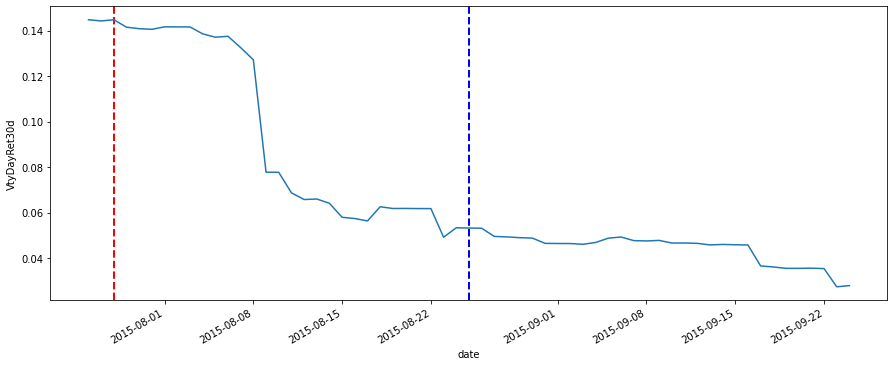

In [470]:
#red line shows us max volatility for the current period 
#blue line shows exact date of halving 

fig, ax = plt.subplots(figsize = (15,6))    
fig.autofmt_xdate() 
plt.axvline(halv1, color='r', linestyle='--', lw=2)
plt.axvline('2015-08-25', color='b', linestyle='--', lw=2)
fig = sns.lineplot(x='date', y='VtyDayRet30d', data=first_halv_prior_post)

In [471]:
#repeating the process from above to the data from the 2nd halving 

first_halv2_prior_post = ltc_vol[ltc_halv_2.index[0]-30:ltc_halv_2.index[0]+31]

In [472]:
first_halv2_prior_post.head()

date  VtyDayRet180d  VtyDayRet60d  VtyDayRet30d
2829 2019-07-06       0.055000      0.058689      0.050074
2830 2019-07-07       0.054941      0.058678      0.049091
2831 2019-07-08       0.054956      0.058735      0.049397
2832 2019-07-09       0.053795      0.058847      0.049467
2833 2019-07-10       0.054201      0.055616      0.047682

In [473]:
max_vol2 = max(first_halv2_prior_post['VtyDayRet30d'])
max_vol2

0.06661427402129658

In [474]:
max_v2 = first_halv2_prior_post[['VtyDayRet30d']][first_halv2_prior_post[['VtyDayRet30d']] == max_vol2]
max_v2 = max_v2.dropna()
max_v2

VtyDayRet30d
2847      0.066614

In [475]:
max_val2_index = max_v2.index[0]
max_val2_index

2847

In [476]:
halv2 = first_halv2_prior_post[['date', 'VtyDayRet30d']].loc[max_val2_index][0]
halv2

Timestamp('2019-07-24 00:00:00')

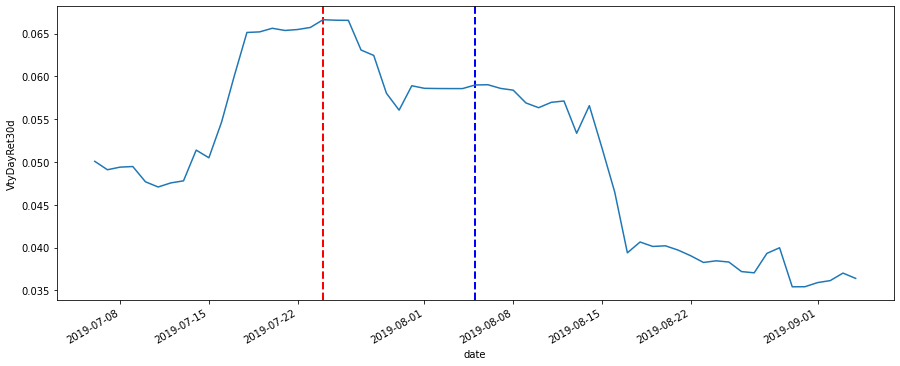

In [478]:
#red line shows us max volatility for the current period 
#blue line shows exact date of halving 

fig, ax = plt.subplots(figsize = (15,6))    
fig.autofmt_xdate() 
plt.axvline(halv2, color='r', linestyle='--', lw=2)
plt.axvline('2019-08-05', color='b', linestyle='--', lw=2)
fig = sns.lineplot(x='date', y='VtyDayRet30d', data=first_halv2_prior_post)

In [479]:
#let's further zoom out and analyze volatility 3 month prior and 3 month post 1st halving 

first_halv_prior_post =  ltc_vol[ltc_halv_1.index[0]-90:ltc_halv_1.index[0]+91]

In [480]:
#90 days prior and 90 days post 1st halving 

first_halv_prior_post.head()

date  VtyDayRet180d  VtyDayRet60d  VtyDayRet30d
1328 2015-05-27       0.052739      0.033501      0.041445
1329 2015-05-28       0.052739      0.033277      0.041433
1330 2015-05-29       0.052739      0.033217      0.041416
1331 2015-05-30       0.052762      0.033240      0.040886
1332 2015-05-31       0.053101      0.035141      0.044088

In [481]:
max_vol = max(first_halv_prior_post['VtyDayRet30d'])
max_vol

0.15086537391228755

In [482]:
#creating mask in order to map index to date of max volatility 

max_v = first_halv_prior_post[['VtyDayRet30d']][first_halv_prior_post[['VtyDayRet30d']] == max_vol]
max_v = max_v.dropna()
max_v

VtyDayRet30d
1377      0.150865

In [483]:
max_val_index = max_v.index[0]
max_val_index

1377

In [484]:
halv1 = first_halv_prior_post[['date', 'VtyDayRet30d']].loc[max_val_index][0]
halv1

Timestamp('2015-07-15 00:00:00')

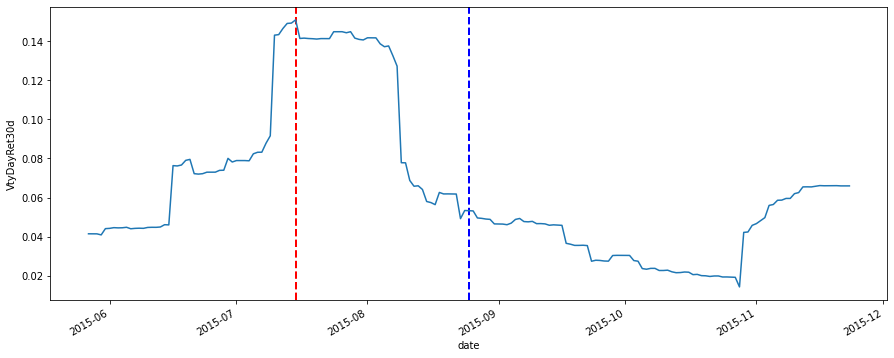

In [486]:
#red line shows us max volatility for the current period 
#blue line shows exact date of halving 

fig, ax = plt.subplots(figsize = (15,6))
fig.autofmt_xdate()
plt.axvline(halv1, color='r', linestyle='--', lw=2)
plt.axvline('2015-08-25', color='b', linestyle='--', lw=2)
fig = sns.lineplot(x='date', y='VtyDayRet30d', data=first_halv_prior_post)

In [ ]:
############################################################################################################

In [488]:
#let's further zoom out and analyze volatility 3 month prior and 3 month post 1st halving 

first_halv2_prior_post =  ltc_vol[ltc_halv_2.index[0]-90:ltc_halv_2.index[0]+91]

In [489]:
#90 days prior and 90 days post 1st halving 

first_halv2_prior_post.head()

date  VtyDayRet180d  VtyDayRet60d  VtyDayRet30d
2769 2019-05-07       0.057643      0.047831      0.040059
2770 2019-05-08       0.057637      0.047691      0.039876
2771 2019-05-09       0.057637      0.047655      0.039605
2772 2019-05-10       0.057681      0.047634      0.040285
2773 2019-05-11       0.059279      0.052960      0.049101

In [497]:
max_vol = max(first_halv2_prior_post['VtyDayRet30d'])
max_vol

0.06725602497783836

In [498]:
#creating mask in order to map index to date of max volatility 

max_v = first_halv2_prior_post[['VtyDayRet30d']][first_halv2_prior_post[['VtyDayRet30d']] == max_vol]
max_v = max_v.dropna()
max_v

VtyDayRet30d
2802      0.067256

In [499]:
max_val_index = max_v.index[0]
max_val_index

2802

In [500]:
halv2 = first_halv2_prior_post[['date', 'VtyDayRet30d']].loc[max_val_index][0]
halv2

Timestamp('2019-06-09 00:00:00')

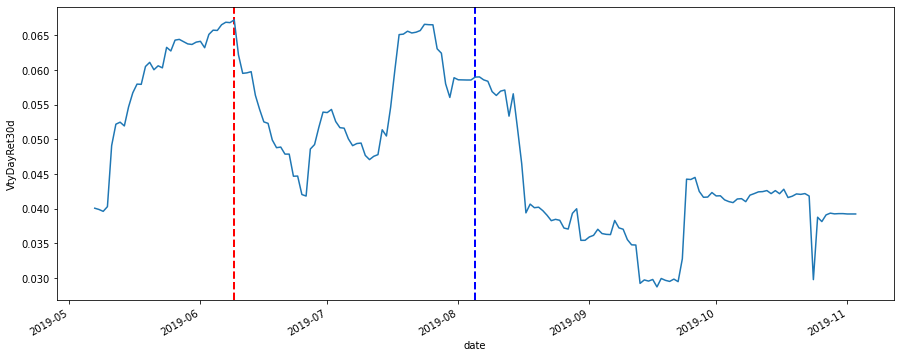

In [503]:
#red line shows us max volatility for the current period 
#blue line shows exact date of halving 

fig, ax = plt.subplots(figsize = (15,6))
fig.autofmt_xdate()
plt.axvline(halv2, color='r', linestyle='--', lw=2)
plt.axvline('2019-08-05', color='b', linestyle='--', lw=2)
fig = sns.lineplot(x='date', y='VtyDayRet30d', data=first_halv2_prior_post)